In [1]:
import cv2
import numpy as np
from crop_letters import contour_letters, letter_28x28, binary, contour_letters_draw


def make_white_frame(image, frame_sz=10):
    w, h = image.shape[:2]
    result_image = 255 * np.ones((w + 2 * frame_sz, h + 2 * frame_sz, 3), dtype=np.uint8)
    for i in range(w):
        for j in range(h):
            result_image[i + 10, j + 10, :] = image[i, j, :]
    return result_image
    

def image_preprocess(path_to_image, transparent_flag=False):
    img = cv2.imread(path_to_image)
    if transparent_flag:
        img = cv2.imread(path_to_image, cv2.IMREAD_UNCHANGED)
        last_col = 255 - img[:, :, 3]
        img = np.dstack((last_col, last_col, last_col))
    resized_image = cv2.resize(img, (60, 60), cv2.INTER_LINEAR)
    img_with_frame = make_white_frame(resized_image)
    gray = cv2.cvtColor(img_with_frame, cv2.COLOR_BGR2GRAY)
    _, bi = binary(gray)
    img_erode = cv2.erode(bi, np.ones((1, 7), np.uint8), iterations=1)
    rectangles = contour_letters(img_erode)
    if not len(rectangles):
        return None
    (x, y, w, h) = rectangles[0]
    letter = letter_28x28(gray[y:(y + h), x:(x + w)])
    return letter


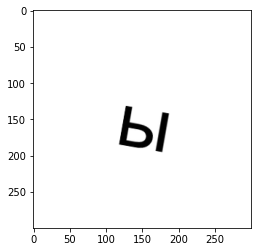

In [2]:
import matplotlib.pyplot as plt

path_to_example = '/home/asya/letters_dataset/маленькая_ы/1.png'
example_picture = cv2.imread(path_to_example)
plt.imshow(example_picture)
plt.show()

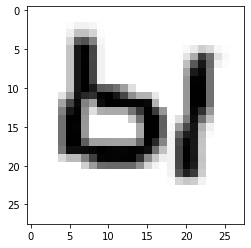

In [3]:
letter = image_preprocess(path_to_example)
plt.imshow(letter, cmap='gray')
plt.show()

In [4]:
import os

PATH_TO_OUR_DATASET = '/home/asya/letters_dataset'
NEW_DATASET_DIR = '/home/asya/final_dataset'

In [5]:
PATH_TO_OUR_DATASET = '/home/asya/letters_dataset'

os.mkdir(NEW_DATASET_DIR)

counter = 0

for symbol_dir in os.listdir(PATH_TO_OUR_DATASET):
    cur_dir = PATH_TO_OUR_DATASET + '/' + symbol_dir
    
    curr_class = symbol_dir
    for pattern in ['big', 'small', 'большая', 'маленькая', 'punct']:
        if pattern in curr_class:
            curr_class = symbol_dir[(len(pattern) + 1):].lower()
            break
    if not os.path.exists(NEW_DATASET_DIR + '/' + curr_class):
        os.mkdir(NEW_DATASET_DIR + '/' + curr_class)
    
    for image_name in os.listdir(cur_dir):
        path_to_image = cur_dir + '/' + image_name
        resized_image = image_preprocess(path_to_image)
        if resized_image is None:
            continue
        new_image_name = str(counter) + '.png'
        counter += 1
        cv2.imwrite(NEW_DATASET_DIR + '/' + curr_class + '/' + new_image_name, resized_image)

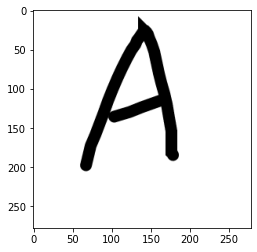

In [6]:
comnist_example_path = '/home/asya/comnist/A/5a0d5cfd92c94.png'
example_picture = cv2.imread(comnist_example_path, cv2.IMREAD_UNCHANGED)
last_col = 255 - example_picture[:, :, 3]
new_img = np.dstack((last_col, last_col, last_col))
plt.imshow(new_img)
plt.show()

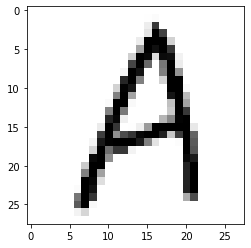

In [7]:
letter = image_preprocess(comnist_example_path, transparent_flag=True)
plt.imshow(letter, cmap='gray')
plt.show()

In [8]:
COMNIST_PATH = '/home/asya/comnist'

for symbol_dir in os.listdir(COMNIST_PATH):
    cur_dir = COMNIST_PATH + '/' + symbol_dir
    
    curr_class = symbol_dir.lower()
    if not os.path.exists(NEW_DATASET_DIR + '/' + curr_class):
        os.mkdir(NEW_DATASET_DIR + '/' + curr_class)
    
    for image_name in os.listdir(cur_dir):
        path_to_image = cur_dir + '/' + image_name
        resized_image = image_preprocess(path_to_image, transparent_flag=True)
        if resized_image is None:
            continue
        new_image_name = str(counter) + '.png'
        counter += 1
        cv2.imwrite(NEW_DATASET_DIR + '/' + curr_class + '/' + new_image_name, resized_image)